In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv(r"C:\Users\Shubham Kumar\Dropbox\PC\Downloads\crack_detection.csv")
df.head(5)

,Unnamed: 0,mean_r,std_r,kur_r,skew_r,mean_g,std_g,kur_g,skew_g,mean_b,...,contrast_r,contrast_g,contrast_b,corr_rg,corr_rb,corr_gb,moment_r,moment_g,moment_b,label
0,0,107.5734,29.267480,0.744029,0.408828,110.2533,26.953218,1.254689,-0.135613,113.5715,...,9.181953,177.0,173.0,162.0,0.951368,0.913876,0.803333,856.585412,726.475939,0
1,1,178.6713,14.917756,3.192406,0.238175,184.4947,14.882156,3.035196,0.141160,190.8538,...,9.207314,142.0,136.0,129.0,0.988325,0.989474,0.976787,222.539456,221.478572,0
2,2,176.6517,34.618255,-0.146336,-0.421552,161.3083,33.688699,0.057178,-0.521476,147.2760,...,9.186737,199.0,200.0,194.0,0.968581,0.967398,0.890845,1198.423587,1134.928451,1
3,3,113.5760,20.084502,0.719752,0.737728,114.0056,19.536222,0.655846,0.729521,113.6179,...,9.197973,146.0,142.0,138.0,0.987383,0.983663,0.961305,403.387224,381.663969,0
4,4,125.3565,29.251595,0.430344,0.833496,129.5277,28.661968,0.475502,0.804161,131.9745,...,9.189257,173.0,176.0,177.0,0.980727,0.986702,0.950291,855.655808,821.508433,1


<AxesSubplot:xlabel='label', ylabel='count'>

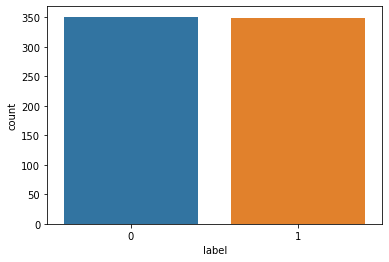

In [4]:
sns.countplot(x="label",data=df)   #seaborn plot for better visualization

In [33]:
train_size=0.6 #now splitting data

In [43]:
X = df.drop(columns = ['label']).copy()
y = df['label']


# # input
# X = df.iloc[:, ["mean_r", "mean_g","mean_b"]].values
 
# # output
# y = df.iloc[:, "label"].values

In [44]:
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.6)

In [45]:
test_size = 0.5    #splitting test and validation set in 50-50

In [46]:
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

In [47]:
print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

(420, 24)
(420,)
(140, 24)
(140,)
(140, 24)
(140,)


(None, None)

In [48]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

svc = SVC(kernel='linear', C=10.0, random_state=1)
svc.fit(X_train, y_train)           #Using one of the model and fitting our data

y_pred = svc.predict(X_test)

# sc_x = StandardScaler()
# xtrain = sc_x.fit_transform(xtrain)
# xtest = sc_x.transform(xtest)

In [49]:
print('F1 Score: %.3f' % f1_score(y_test, y_pred))   #directly calculating F1 score using formula

F1 Score: 0.811


In [50]:
# from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8071428571428572